In [8]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
vasili_stats = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/plots/SupTable_Sample_Stats_wGT_QC.tsv"
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

vasili_table = pd.read_csv(vasili_stats, sep="\t")
sub_vasili = vasili_table.loc[(vasili_table.finalQC != "fail")
                              & (vasili_table.cov_chrA >= 20)
                              & (vasili_table.remove_as_relative != True)
                              & (vasili_table.remove_manual != True)
                              & (~vasili_table.ID.str.startswith("SAMEA11633"))]


In [3]:
glob.glob(metadata_path+"Ma*")

['/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Mandrillus_references.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Macaca_short_read_accessions.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Mandrillus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Macaca_references.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Macaca_regions_and_batches.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Macaca_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Mandrillus_short_read_accessions.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Mandrillus_regions_and_batches.txt']

In [4]:
sub_vasili.loc[sub_vasili.genus == "Macaca"]

,ID,ID_PGDP,group,family,genus,species,subspecies,species_full,species_short,species_genotyping,...,reason,finalQC,Kuderna_AB_QC,Kuderna_COV_QC,relatives,remove_as_relative,generation,founder,remove_manual,pedigree_source
776,SAMD00215308,SAMD00215308,OWM,Cercopithecidae,Macaca,fascicularis,aureus,Macaca_fascicularis_aureus,M.fascicularis_aureus,Macaca_fascicularis_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,SAMD00215309,SAMD00215309,OWM,Cercopithecidae,Macaca,fascicularis,aureus,Macaca_fascicularis_aureus,M.fascicularis_aureus,Macaca_fascicularis_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,PD_0539,PD_0539,OWM,Cercopithecidae,Macaca,fascicularis,ssp,Macaca_fascicularis_ssp,M.fascicularis_ssp,Macaca_fascicularis_ssp,...,sub-species,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,PD_0816,PD_0816,OWM,Cercopithecidae,Macaca,fascicularis,ssp,Macaca_fascicularis_ssp,M.fascicularis_ssp,Macaca_fascicularis_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782,PD_0817,PD_0817,OWM,Cercopithecidae,Macaca,fascicularis,ssp,Macaca_fascicularis_ssp,M.fascicularis_ssp,Macaca_fascicularis_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,PD_0562,PD_0562,OWM,Cercopithecidae,Macaca,radiata,ssp,Macaca_radiata_ssp,M.radiata_ssp,Macaca_radiata_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1547,PD_0563,PD_0563,OWM,Cercopithecidae,Macaca,radiata,ssp,Macaca_radiata_ssp,M.radiata_ssp,Macaca_radiata_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1548,PD_0564,PD_0564,OWM,Cercopithecidae,Macaca,radiata,ssp,Macaca_radiata_ssp,M.radiata_ssp,Macaca_radiata_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,SAMN02390221,SAMN02390221,OWM,Cercopithecidae,Macaca,thibetana,ssp,Macaca_thibetana_ssp,M.thibetana_ssp,Macaca_thibetana_ssp,...,NaN,ok,PASS,WARN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.read_csv('/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Macaca_regions_and_batches.txt',
           sep="\t")

In [6]:
df.loc[df.REFERENCE_FOLDER == "Macaca_fascicularis_ssp"]

,REFERENCE_FOLDER,REGION,CONTIG_ID,START,END,BATCH,FEMALE_PLOIDY,MALE_PLOIDY
0,Macaca_fascicularis_ssp,CP141361.1,CP141361.1,0,234122563,0,2,2
1,Macaca_fascicularis_ssp,CP141360.1,CP141360.1,0,203129947,1,2,2
2,Macaca_fascicularis_ssp,CP141359.1,CP141359.1,0,200656507,2,2,2
3,Macaca_fascicularis_ssp,CP141358.1,CP141358.1,0,173030664,3,2,2
4,Macaca_fascicularis_ssp,CP141357.1,CP141357.1,0,194799049,4,2,2
5,Macaca_fascicularis_ssp,CP141356.1,CP141356.1,0,188935743,5,2,2
6,Macaca_fascicularis_ssp,CP141355.1,CP141355.1,0,176059691,6,2,2
7,Macaca_fascicularis_ssp,CP141354.1,CP141354.1,0,154933826,7,2,2
8,Macaca_fascicularis_ssp,CP141353.1,CP141353.1,0,142802635,8,2,2
9,Macaca_fascicularis_ssp,CP141352.1,CP141352.1,0,120451489,9,2,2


In [124]:
sub_vasili.loc[sub_vasili.species == "arctoides"].species_genotyping.unique()

array(['Macaca_arctoides_ssp'], dtype=object)

In [126]:
df_l = []
for s in sub_vasili.loc[sub_vasili.species == "arctoides"].species_genotyping.unique():
    p = '../results/window_stats_20x_inds/{}_100kb_pi_fst0.1.txt'.format(s)
    df = pd.read_csv(p, sep="\t")
    cluster_count = sum([x.startswith("pi") for x in df.columns])
    if cluster_count == 1:
        mcount_l.append(len(sub_vasili.loc[(sub_vasili.species_genotyping == s) & (sub_vasili.gSEX == "M")]))
        fcount_l.append(len(sub_vasili.loc[(sub_vasili.species_genotyping == s) & (sub_vasili.gSEX == "F")]))
    else:
        fst_p = '../results/window_stats_20x_inds/{}_0.1cutoff_fst.txt'.format(s)
        aut_fst = pd.read_csv(fst_p, sep="\t")
        model = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None, metric="precomputed", linkage="average")
        model = model.fit(aut_fst.clip(0))
        for x in range(cluster_count):
            cluster_IDs = sub_vasili.loc[(sub_vasili.species_genotyping == s)].iloc[model.labels_ == x]
            mcount_l.append(len(cluster_IDs.loc[(cluster_IDs.gSEX == "M")]))
            fcount_l.append(len(cluster_IDs.loc[(cluster_IDs.gSEX == "F")]))
    hap_total = 1
    best_cluster = 0
    for i in range(cluster_count):
        if mcount_l[i]+fcount_l[i]*2 > hap_total:
            best_cluster = i
            hap_total = mcount_l[i]+fcount_l[i]*2
    best_df = pd.concat([df.iloc[:,:2], df.iloc[:,best_cluster*2+2:best_cluster*2+4], df.iloc[:,-4:]], axis=1)
    
    df_l.append(best_df)
best_cluster_df = pd.concat(df_l)

In [127]:
best_df_call = best_df.loc[best_df.callable_frac >= 0.75]
x_df = best_df_call.loc[best_df_call.chr_type == "chrX"]
x_df["quantile_bin"] = pd.qcut(x_df["pi_1"], 10, duplicates="drop")
aut_df = best_df_call.loc[best_df_call.chr_type == "aut"]
aut_df["quantile_bin"] = pd.qcut(aut_df["pi_1"], 10, duplicates="drop")

/tmp/18558503/ipykernel_3318475/1659268744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df["quantile_bin"] = pd.qcut(x_df["pi_1"], 10, duplicates="drop")
/tmp/18558503/ipykernel_3318475/1659268744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aut_df["quantile_bin"] = pd.qcut(aut_df["pi_1"], 10, duplicates="drop")


In [128]:
aut_df

,window_start,chrom,divergence_1,pi_1,window_end,callable_frac,chr_type,species,quantile_bin
0,0,NC_065578.1,957.5,134.000000,100000,0.94626,aut,Macaca_arctoides_ssp,"(117.5, 141.167]"
1,100000,NC_065578.1,994.5,255.000000,200000,0.96333,aut,Macaca_arctoides_ssp,"(241.0, 282.333]"
2,200000,NC_065578.1,890.0,137.500000,300000,0.91255,aut,Macaca_arctoides_ssp,"(117.5, 141.167]"
3,300000,NC_065578.1,977.0,269.166667,400000,0.88527,aut,Macaca_arctoides_ssp,"(241.0, 282.333]"
4,400000,NC_065578.1,1014.0,214.833333,500000,0.94584,aut,Macaca_arctoides_ssp,"(211.333, 241.0]"
...,...,...,...,...,...,...,...,...,...
26462,75200000,NC_065597.1,1068.5,377.166667,75300000,0.89745,aut,Macaca_arctoides_ssp,"(282.333, 2348.5]"
26463,75300000,NC_065597.1,1082.5,197.000000,75400000,0.90673,aut,Macaca_arctoides_ssp,"(186.5, 211.333]"
26464,75400000,NC_065597.1,1348.0,230.166667,75500000,0.92980,aut,Macaca_arctoides_ssp,"(211.333, 241.0]"
26465,75500000,NC_065597.1,968.5,268.333333,75600000,0.92599,aut,Macaca_arctoides_ssp,"(241.0, 282.333]"


In [129]:
x_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]/aut_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]

/tmp/18558503/ipykernel_3318475/88890895.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]/aut_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]
/tmp/18558503/ipykernel_3318475/88890895.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]/aut_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]


0    0.469392
1    0.304992
2    0.243441
3    0.222414
4    0.217529
5    0.228661
6    0.256676
7    0.292318
8    0.343235
9    0.416267
Name: pi_1, dtype: float64

In [130]:
aut_quantile = aut_df.groupby("quantile_bin")["pi_1"].mean().reset_index()
aut_quantile["Quantile Ratio"] =  x_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]/aut_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]

/tmp/18558503/ipykernel_3318475/1469970920.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aut_quantile = aut_df.groupby("quantile_bin")["pi_1"].mean().reset_index()
/tmp/18558503/ipykernel_3318475/1469970920.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aut_quantile["Quantile Ratio"] =  x_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]/aut_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]
/tmp/18558503/ipykernel_3318475/1469970920.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fa

In [131]:
aut_quantile#.reset_index()

,quantile_bin,pi_1,Quantile Ratio
0,"(10.999, 53.667]",36.107134,0.469392
1,"(53.667, 89.167]",72.537792,0.304992
2,"(89.167, 117.5]",103.797737,0.243441
3,"(117.5, 141.167]",129.558137,0.222414
4,"(141.167, 163.5]",152.379863,0.217529
5,"(163.5, 186.5]",174.911873,0.228661
6,"(186.5, 211.333]",198.807091,0.256676
7,"(211.333, 241.0]",225.734528,0.292318
8,"(241.0, 282.333]",260.053036,0.343235
9,"(282.333, 2348.5]",348.737106,0.416267


[Text(0.5, 0, 'Mean Bin Pi'), Text(0.5, 1.0, 'Macaca Arctoides')]

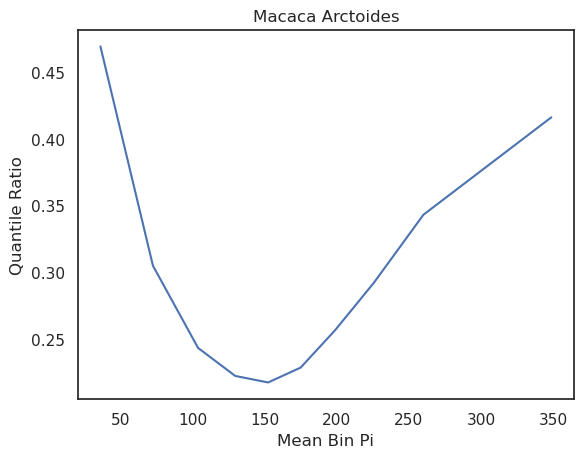

In [132]:
g = sns.lineplot(aut_quantile, x="pi_1", y="Quantile Ratio", legend=False)
g.set(xlabel = "Mean Bin Pi", title="Macaca Arctoides")

[Text(0.5, 0, 'Mean Bin Pi'), Text(0.5, 1.0, 'Macaca Fascicularis')]

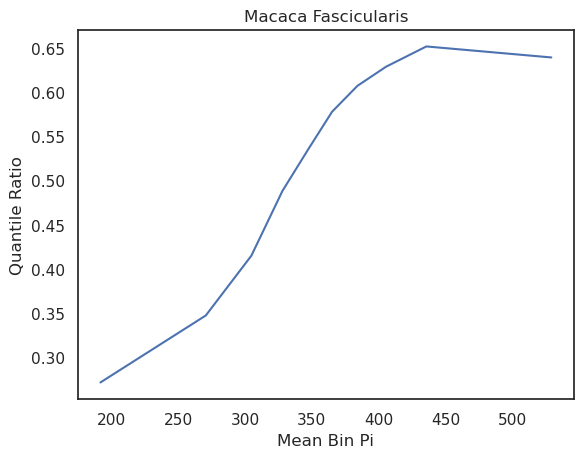

In [120]:
g = sns.lineplot(aut_quantile, x="pi_1", y="Quantile Ratio", legend=False)
g.set(xlabel = "Mean Bin Pi", title="Macaca Fascicularis")

In [ ]:
sns.lineplot()

In [77]:
aut_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]

/tmp/18558503/ipykernel_3318475/957211376.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aut_df.groupby("quantile_bin")["pi_1"].mean().reset_index()["pi_1"]


0     36.107134
1     72.537792
2    103.797737
3    129.558137
4    152.379863
5    174.911873
6    198.807091
7    225.734528
8    260.053036
9    348.737106
Name: pi_1, dtype: float64

In [28]:
df.iloc[:,best_cluster*2+3]

0        316.655235
1        269.348057
2        207.881504
3        715.515376
4        539.642510
            ...    
30433     19.973532
30434     21.408586
30435     17.756555
30436     26.726027
30437     15.376307
Name: pi_1, Length: 30438, dtype: float64

In [27]:
df.iloc[:,:2]+df.iloc[:,best_cluster*2+3]

,0,1,2,3,4,5,6,7,8,9,...,30430,30431,30432,30433,30434,30435,30436,30437,chrom,window_start
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df

,window_start,chrom,divergence_0,pi_0,divergence_1,pi_1,divergence_2,pi_2,divergence_3,pi_3,...,divergence_5,pi_5,divergence_6,pi_6,divergence_7,pi_7,window_end,callable_frac,chr_type,species
0,0,CP141361.1,771.416667,353.165994,592.964286,316.655235,755.000000,287.933333,540.0,140.0,...,738.0,48.0,715.0,363.0,875.0,107.0,100000,0.67433,aut,Macaca_fascicularis_ssp
1,100000,CP141361.1,765.666667,321.043687,510.276786,269.348057,789.666667,332.400000,709.0,261.0,...,832.0,32.0,829.0,159.0,876.0,0.0,200000,0.96593,aut,Macaca_fascicularis_ssp
2,200000,CP141361.1,571.416667,308.722197,289.455357,207.881504,629.666667,299.233333,303.0,251.0,...,461.0,37.0,592.0,302.0,541.0,1.0,300000,0.95908,aut,Macaca_fascicularis_ssp
3,300000,CP141361.1,1031.416667,678.849828,898.294643,715.515376,1200.333333,710.900000,1160.0,742.0,...,1185.0,347.0,1153.0,693.0,1073.0,457.0,400000,0.89413,aut,Macaca_fascicularis_ssp
4,400000,CP141361.1,851.583333,589.435829,745.875000,539.642510,1418.666667,602.500000,852.0,568.0,...,553.0,145.0,702.0,474.0,802.0,88.0,500000,0.86283,aut,Macaca_fascicularis_ssp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30433,161700000,CP141341.1,68.583333,53.542882,143.535714,19.973532,131.333333,36.333333,156.0,20.0,...,67.0,NaN,12.0,4.0,639.0,1.0,161800000,0.92319,chrX,Macaca_fascicularis_ssp
30434,161800000,CP141341.1,77.916667,63.703041,211.473214,21.408586,138.666667,40.833333,234.0,18.0,...,95.0,NaN,17.0,7.0,807.0,1.0,161900000,0.96847,chrX,Macaca_fascicularis_ssp
30435,161900000,CP141341.1,61.583333,51.380495,137.482143,17.756555,105.333333,16.433333,139.0,7.0,...,69.0,NaN,11.0,9.0,630.0,2.0,162000000,0.97088,chrX,Macaca_fascicularis_ssp
30436,162000000,CP141341.1,58.333333,59.054421,103.160714,26.726027,89.333333,28.366667,108.0,14.0,...,65.0,NaN,33.0,27.0,331.0,13.0,162100000,0.59765,chrX,Macaca_fascicularis_ssp


In [22]:
hap_total

206

In [19]:
mcount_l+fcount_l

[8, 18, 0, 0, 1, 1, 0, 0, 4, 94, 3, 1, 0, 0, 1, 1]

In [17]:
max_val = max(list_c)
idx_max = list_c.index(max_val)

[8, 18, 0, 0, 1, 1, 0, 0]

In [14]:
df

,window_start,chrom,divergence_0,pi_0,divergence_1,pi_1,divergence_2,pi_2,divergence_3,pi_3,...,divergence_5,pi_5,divergence_6,pi_6,divergence_7,pi_7,window_end,callable_frac,chr_type,species
0,0,CP141361.1,771.416667,353.165994,592.964286,316.655235,755.000000,287.933333,540.0,140.0,...,738.0,48.0,715.0,363.0,875.0,107.0,100000,0.67433,aut,Macaca_fascicularis_ssp
1,100000,CP141361.1,765.666667,321.043687,510.276786,269.348057,789.666667,332.400000,709.0,261.0,...,832.0,32.0,829.0,159.0,876.0,0.0,200000,0.96593,aut,Macaca_fascicularis_ssp
2,200000,CP141361.1,571.416667,308.722197,289.455357,207.881504,629.666667,299.233333,303.0,251.0,...,461.0,37.0,592.0,302.0,541.0,1.0,300000,0.95908,aut,Macaca_fascicularis_ssp
3,300000,CP141361.1,1031.416667,678.849828,898.294643,715.515376,1200.333333,710.900000,1160.0,742.0,...,1185.0,347.0,1153.0,693.0,1073.0,457.0,400000,0.89413,aut,Macaca_fascicularis_ssp
4,400000,CP141361.1,851.583333,589.435829,745.875000,539.642510,1418.666667,602.500000,852.0,568.0,...,553.0,145.0,702.0,474.0,802.0,88.0,500000,0.86283,aut,Macaca_fascicularis_ssp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30433,161700000,CP141341.1,68.583333,53.542882,143.535714,19.973532,131.333333,36.333333,156.0,20.0,...,67.0,NaN,12.0,4.0,639.0,1.0,161800000,0.92319,chrX,Macaca_fascicularis_ssp
30434,161800000,CP141341.1,77.916667,63.703041,211.473214,21.408586,138.666667,40.833333,234.0,18.0,...,95.0,NaN,17.0,7.0,807.0,1.0,161900000,0.96847,chrX,Macaca_fascicularis_ssp
30435,161900000,CP141341.1,61.583333,51.380495,137.482143,17.756555,105.333333,16.433333,139.0,7.0,...,69.0,NaN,11.0,9.0,630.0,2.0,162000000,0.97088,chrX,Macaca_fascicularis_ssp
30436,162000000,CP141341.1,58.333333,59.054421,103.160714,26.726027,89.333333,28.366667,108.0,14.0,...,65.0,NaN,33.0,27.0,331.0,13.0,162100000,0.59765,chrX,Macaca_fascicularis_ssp


In [13]:
model.labels_.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'